In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Define the class for Lattice
class Lattice(object):
    """A user-defined data structure that stores and manipulates lattice (2D - arrays)
    """

    def __init__(self, width, height, p):
        """Constructs a board of width and height"""
        self.height = height
        self.width = width
        self.data = np.random.rand(self.height, self.width)
        self.p = p
        self.clusters = []
        self.visited = set()
        self.span_clusters = []

        for i in range(0, height):
            for j in range(0, width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= self.p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
    
    def __repr__(self):
        """Creates a 2D representation of the board object"""
        plt.imshow(self.data, cmap='gray')
        plt.show()
        return ""
    
    def clear(self):
        """clears the board, making the board only contain ' ' strings
        Return: nothing, the 2D array is changed
        """
        for i in range(0, self.height):
            for j in range(0, self.width):
                self.data[i][j] = 0

    def get_clusters(self):
        for i in range(self.height):
            for j in range(self.width):
                if self.data[i][j] == 1:
                    cluster = self.finish_cluster(i,j)
                    if i == 0 or j == 0:
                        self.span_clusters.append(cluster)
                    self.clusters.append(cluster)
        
        num_clusters = len(self.clusters)      
        return num_clusters, self.clusters, self.span_clusters
    
    def finish_cluster(self, i, j):
        if not (0 <= i < self.height and 0 <= j < self.width):
             return []
        if self.data[i][j] != 1 or (i, j) in self.visited:
            return []
        self.visited.add((i, j))
        print(f"{i}, {j}")
        res = [(i, j)] 
        res += self.finish_cluster(i+1, j)
        res += (self.finish_cluster(i, j+1))
        res += (self.finish_cluster(i,j-1))
        # print("res: ", res)
        return res 

    def color_spanning_cluster(self):
        """Colors spanning clusters """
        num_clusters, clusters, spanning = self.get_clusters()
        span_data = self.data
        for i in range(self.height):
            for j in range(self.width):
                if (i, j) in spanning[0]:
                    span_data[i][j] = -1
        plt.imshow(span_data, cmap='gray')
        plt.show()
        return ""


In [32]:
lattice = Lattice(10,10,0.4)

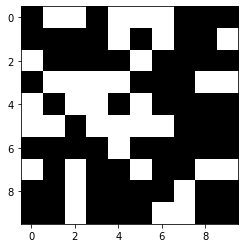

In [33]:
print(lattice)

0, 1
0, 2
0, 4
1, 4
0, 5
0, 6
1, 6
1, 9
2, 0
2, 5
3, 1
3, 2
4, 2
4, 3
5, 3
5, 4
6, 4
5, 5
5, 6
3, 3
3, 4
3, 8
3, 9
4, 0
5, 0
5, 1
4, 5
7, 0
7, 2
8, 2
9, 2
7, 5
7, 8
7, 9
8, 7
9, 7
9, 6
37 [[(0, 1), (0, 2)], [], [(0, 4), (1, 4), (0, 5), (0, 6), (1, 6)], [], [], [(2, 0)], [(4, 0), (5, 0), (5, 1)], [], [(7, 0)]]


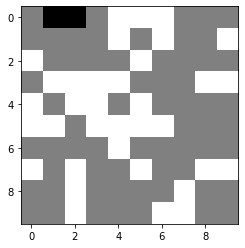

''

In [34]:
num_clusters, clusters, spanning = lattice.get_clusters()

#print(num_clusters,clusters,spanning)
print(num_clusters,spanning)
lattice.color_spanning_cluster()

In [30]:
test = []
print(test)

[]


In [7]:
test.append([])
print(test)

[[]]
